<p style="background-color:mediumseagreen;font-family:newtimeroman;font-size:200%;color:white;text-align:center;border-radius:60px 20px;"><b>Handwritten Digits Prediction with CNN</b></p>

<div style="text-align: center;">
    <img src="https://miro.medium.com/v2/resize:fit:1400/1*1pNxRd2xtZVbACX8cYBBdg.png" width="600" height="600"/>
</div>

In this notebook, we are going to dive into the MNIST (Modified National Institute of Standards and Technology) database. It can be said that the MNIST handprinted character image dataset is the “Hello World” implementation for machine learning, and the dataset is used as a worldwide machine learning benchmark. It is an extremely good database for people who want to try machine learning techniques and pattern recognition methods on real-world data while spending minimal time and effort on data preprocessing and formatting. Its simplicity and ease of use are what make this dataset so widely used and deeply understood. Therefore, the goal of this tutorial is to show you how this dataset can be used in a digits recognition example using Convolutional Neural Network (CNN), which achieves a high classification accuracy on the test dataset. On a larger perspective, we will emphasize on MNIST’s importance and impact in the world of machine learning.

MNIST is a large database of small, square 28x28 pixel grayscale images of handwritten single digits between 0 and 9. It consists of a total of 70,000 handwritten images of digits, with the training set having 60,000 images and the test set having 10,000. All images are labeled with the respective digit that they represent. There are a total of 10 classes of digits (from 0 to 9).

Our task is to classify a given image of a handwritten digit into one of 10 classes representing integer values from 0 to 9, inclusively using a CNN that will be able to recognize the handwritten digits. CNN is a type of deep neural network commonly used for computer vision applications. So we will build an image classifier TensorFlow’s Keras API on the MNIST dataset. Keras is a Python library and is highly recommended for beginners due to its smooth learning curve. It is very commonly used in implementing neural networks. 

# <font color='mediumseagreen'> <b>Importing Libraries & Dataset</b><font color='black'>  

In [5]:
import pandas as pd
import seaborn as sns
import tensorflow as tf                       
import numpy as np                           
import matplotlib.pyplot as plt               
%matplotlib inline

In [6]:
from tensorflow.keras.datasets.mnist import load_data    # To load the MNIST digit dataset

This is used to load the MNIST dataset from the Keras module under the TensorFlow library. MNIST is a dataset containing handwritten digits and is frequently used for training machine learning models. The `load_data` function downloads and loads the dataset. To run this code, TensorFlow must be installed and properly set up on your computer.


In [8]:
(X_train, y_train) , (X_test, y_test) = load_data()      # Loading data

This is used to split the data loaded from the MNIST dataset into training and test sets. The `load_data()` function loads the MNIST dataset, and in this line, the data is separated into training data (`X_train`, `y_train`) and test data (`X_test`, `y_test`). 

- `X_train` and `X_test` are 3-dimensional tensors containing the pixel values of the images.  
- `y_train` and `y_test` are 1-dimensional tensors containing the correct class labels for the imags.


In [10]:
print(X_train.shape, y_train.shape)

(60000, 28, 28) (60000,)


This code prints the shape of the `X_train` and `y_train` data. 

- `X_train.shape` returns the shape of the training data as a 3-dimensional tensor. The first dimension represents the number of training samples, while the second and third dimensions represent the height and width of the images.  
- `y_train.shape` returns the shape of the `y_train` data as a 1-dimensional tensor. This dimension corresponds to the number of training samples, where each element contains the correct class label for the corresponding sample.

The output of this code indicates the shape of the training data and the labels.

In [12]:
print(X_test.shape, y_test.shape)

(10000, 28, 28) (10000,)


The `X_test` tensor contains the images of the test samples from the MNIST dataset. Since these images are grayscale, each image has only one channel, meaning there is no third dimension. Therefore, the shape of the `X_test` tensor is `(10000, 28, 28)`, representing 10,000 test samples, each with a 28x28 pixel black-and-white image.

However, if the images were colored (RGB), each pixel would have red, green, and blue channels. In that case, the `X_test` tensor would have a third dimension, and its shape would be `(10000, 28, 28, 3)`.

The MNIST dataset contains handwritten digit images. Classifying these images, i.e., determining which digit corresponds to which image, is an example of a classification problem. In the MNIST dataset, each image contains only one digit. Therefore, each image belongs to a single class, and the `y_train` and `y_test` tensors contain the class label corresponding to each image.

The shape of the `y_train` tensor corresponds to the number of samples in the training set. For example, if there are 50,000 samples in the training set, the `y_train` tensor will have a shape of `(50000,)`. Each element represents the correct class label for the corresponding sample. The `y_train` tensor is one-dimensional because each element contains only a single class label, such as "This image represents the digit 5." Hence, the `y_train` tensor is defined as a one-dimensional tensor.

In [14]:
print("There are ", len(X_train), "images in the training dataset")     
print("There are ", len(X_test), "images in the test dataset")   

There are  60000 images in the training dataset
There are  10000 images in the test dataset


In [15]:
# Checking the shape of one image
X_train[68].shape

(28, 28)

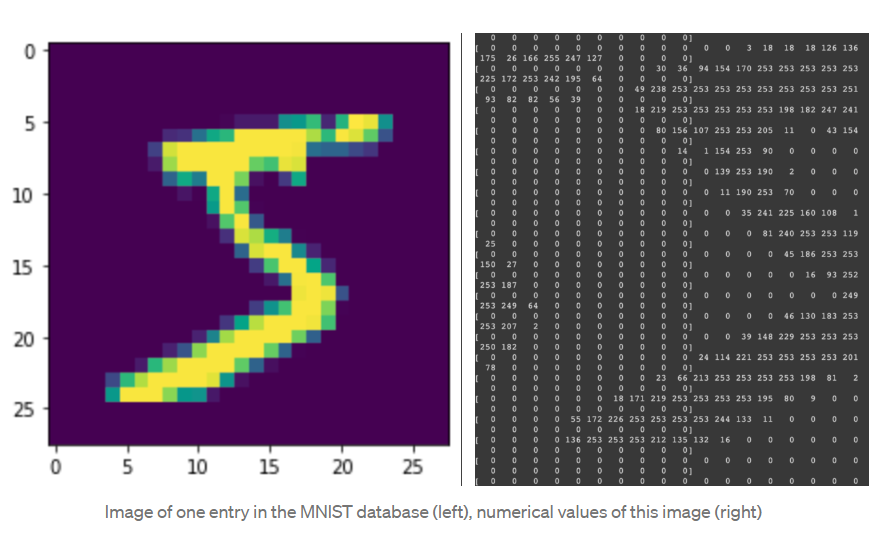

In [17]:
X_train[169]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,  42, 235, 255,  84,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  15,
        132, 208, 253, 253, 171, 108,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

In [18]:
import matplotlib.pyplot as plt

In [19]:
plt.imshow(X_train[169], cmap= plt.cm.binary);

The `cmap=plt.cm.binary` parameter specifies a color map that is used to obtain a black-and-white image.

In [21]:
plt.imshow(X_train[768]);

In [22]:
X_train[768]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   7,
         24,  24,  77,  98, 139, 139, 192, 245, 139, 139,  25,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  30, 187,
        253, 253, 254, 253, 253, 253, 253, 254, 224, 207,  37,   0,   0,
          0,   0],
       [  

In [23]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

This code block creates a subsample of 3 rows and 6 columns randomly selected from the MNIST dataset. Then, it displays each sample's label (`y_train`) and image (`X_train`) within the subsample.

The line `f, ax = plt.subplots(3, 6, figsize=(12,5),...)` creates a subplot with 3 rows and 6 columns, storing it in the `ax` variable. The `gridspec_kw` argument adjusts the spacing between the rows and columns of the subplot. The `squeeze=True` argument removes extra dimensions from the subplots, leaving only the row and column dimensions.

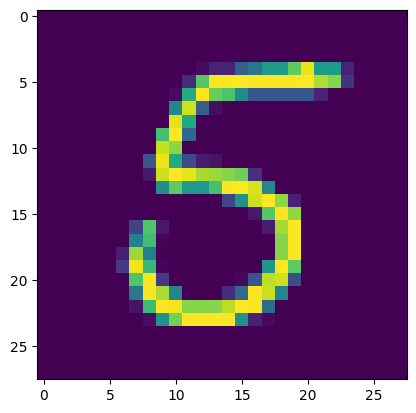

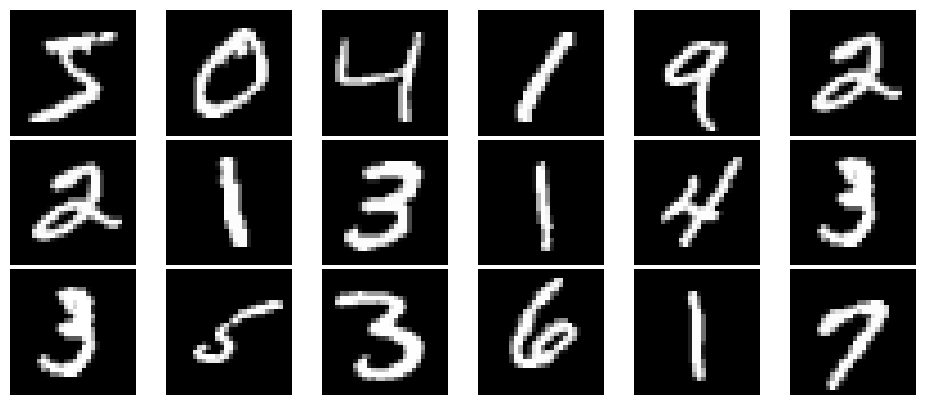

In [25]:
num_rows, num_cols = 3, 6                      # Selecting 3 rows and 6 columns from the data
f, ax = plt.subplots(3, 6, figsize=(12,5),
                     gridspec_kw={'wspace':0.04, 'hspace':0.03}, 
                     squeeze=True)

for r in range(num_rows):
    for c in range(num_cols):
      
        image_index = r * 5 + c
        ax[r,c].axis("off")
        ax[r,c].imshow( X_train[image_index], cmap='gray')
plt.show()
plt.close()

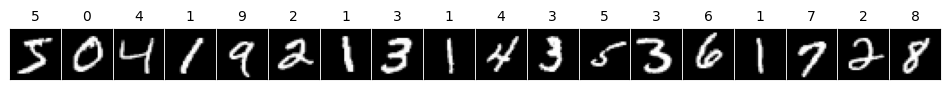

In [26]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(nrows=1, ncols=18, figsize=(12,5),
                         gridspec_kw={'wspace':0.04, 'hspace':0.03}, 
                         squeeze=True)

for i, ax in enumerate(axes.flat):
    ax.imshow(X_train[i], cmap='gray')
    ax.set_xticks([]), ax.set_yticks([])
    ax.set_title(str(y_train[i]), fontsize=10)
    
plt.show()

# <font color='mediumseagreen'> <b>Data Preparation</b><font color='black'>  

In [28]:
X_train[9].min()

0

In [29]:
X_train[9].max()

255

In [30]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# manual scaling
X_train /= 255
X_test /= 255

This code block is used to normalize the pixel values of images in the MNIST dataset from the range of 0–255 to the range of 0–1. The first two lines convert the data type of the `X_train` and `X_test` NumPy arrays to `float32`. The next two lines divide each pixel by 255, which is the maximum pixel value, allowing each pixel to be represented as a decimal number between 0 and 1. This can help the network learn better and makes data processing easier.

In [32]:
X_train[17]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [33]:
X_train[17].min()

0.0

In [34]:
X_train[17].max()

1.0

In [35]:
plt.imshow(X_train[9]);

In [36]:
X_train = X_train.reshape(X_train.shape[0],28, 28, 1) 
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

The code block above reshapes the images in the MNIST dataset to the appropriate dimensions. Each image in the MNIST dataset is 28x28 pixels. However, for a Convolutional Neural Network (CNN) model, the input data needs to be in the form of a 3D tensor, so each image is converted into a tensor with the shape 28x28x1.

This process is done using the `reshape()` function. Here, the `X_train` and `X_test` arrays contain the training and test data, respectively. `X_train.shape[0]` and `X_test.shape[0]` represent the number of samples in each array. Each of these samples is an image with a size of 28x28 pixels.

In the `reshape()` function, new dimensions are specified for each sample. By using `X_train.shape[0]` and `X_test.shape[0]`, the number of samples in each array is preserved. Thus, each sample is transformed into a tensor with the shape 28x28x1.

As a result, the `X_train` and `X_test` arrays contain 3D tensors, each with dimensions 28x28x1. These tensors are in a format suitable for use as input to a CNN model.

This transformation is used to make the MNIST dataset images compatible with Convolutional Neural Networks (CNNs). The `reshape()` function converts each image in the `X_train` and `X_test` NumPy arrays into 4-dimensional tensors, where the height and width are 28x28 pixels, and there is only one color channel.

This transformation aligns with the tensor format required by CNNs. In 4D tensors:
- The first dimension represents the number of images,
- The second and third dimensions represent the image height and width,
- The fourth dimension represents the number of color channels per pixel (in this case, only 1 grayscale channel).

In [38]:
X_train.shape, X_test.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

If `X_train` were a single matrix with the shape (60000, 28, 28), it would not be possible to input it into a CNN model because CNN models expect a 4-dimensional data structure. Therefore, the reshape operation is performed to convert `X_train` into a 4-dimensional data structure with the shape (60000, 28, 28, 1).

In [40]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [41]:
X_train[777].shape

(28, 28, 1)

In [42]:
from tensorflow.keras.utils import to_categorical

In [43]:
y_train[115]

4

In [44]:
Y_train = to_categorical(y_train, 10) 
Y_test = to_categorical(y_test, 10)
Y_test.shape

(10000, 10)

The code block above is used to properly encode the labels in the MNIST dataset. Each image in the MNIST dataset represents a digit from 0 to 9. These digits are used as class labels in the training and testing datasets.

However, machine learning algorithms typically work with the vectorized format of class labels rather than using them directly. Therefore, the `to_categorical()` function is used to encode the class labels as 10-dimensional vectors.

For example, if the label of an image is "5", this label is transformed into [0, 0, 0, 0, 0, 1, 0, 0, 0, 0] using the `to_categorical()` function. Here, the "5" digit is located at the 6th index, and this index is encoded as 1, while the other indices are encoded as 0.

This code converts the `y_train` and `y_test` labels into a binary class matrix. This is useful for multiclass classification problems. Since there are 10 different classes, a 10-dimensional matrix is created with values corresponding to the classes.

Thus, a `y_test` matrix of shape (10000, 10) will be generated.

In [46]:
Y_train[115]

array([0., 0., 0., 0., 1., 0., 0., 0., 0., 0.])

In [47]:
Y_train[715]

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.])

# <font color='mediumseagreen'> <b>Modeling</b><font color='black'>  

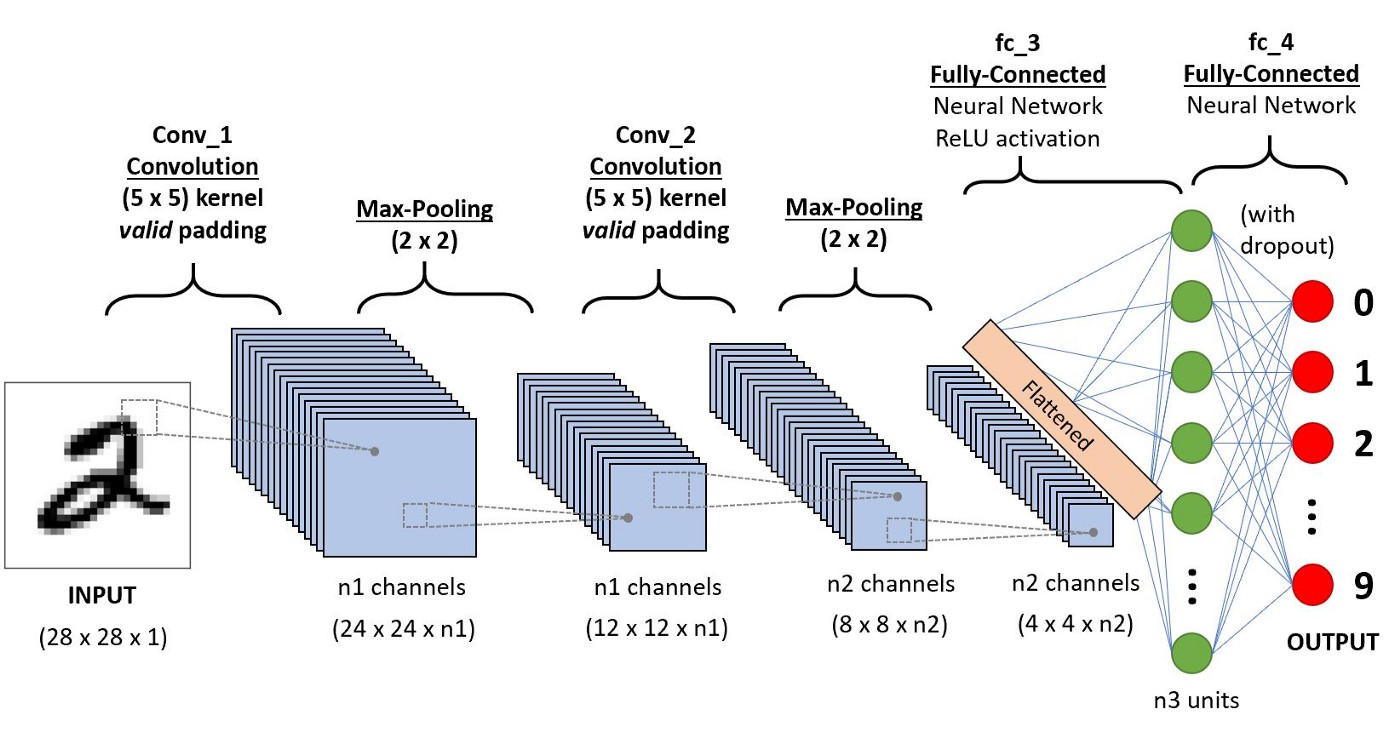

In [50]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, BatchNormalization, Dropout

The term "2D" here refers to working with two-dimensional images. This is specifically used for Convolutional Neural Networks (CNN), which are widely used in image processing applications. CNNs are a deep learning architecture that allows feature extraction from image data using 2D filters. Therefore, CNNs typically use 2D convolutions, 2D Max Pooling, and 2D data formats.

This indicates that the data to be used in the neural network is two-dimensional. In this case, since the data is 28x28 pixels, it is represented as 2D. A 3D representation, on the other hand, is used for three-dimensional data types such as video.

In [52]:
model = Sequential()

# Convolutional layers
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Add Batch Normalization
model.add(BatchNormalization())

# Add Dropout (dropout rate: 0.25)
model.add(Dropout(0.25))

# New Convolutional layer
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Add Batch Normalization
model.add(BatchNormalization())

# Add Dropout (dropout rate: 0.25)
model.add(Dropout(0.25))

# Fully connected layers
model.add(Flatten())
model.add(Dense(128, activation='relu'))

# Add Batch Normalization
model.add(BatchNormalization())

# Add Dropout (dropout rate: 0.5)
model.add(Dropout(0.5))

# Output layer
model.add(Dense(10, activation='softmax'))

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

C:\Users\refia\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


The `input_shape` parameter is necessary to specify the input data dimensions. If this parameter is not specified in the first layer of the model, a data dimension mismatch error will occur during training. Therefore, the `input_shape` parameter must be specified in the first layer of the model.

In [54]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 13, 13, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 5, 5, 64)            │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 1600)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         204,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 128)                 │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 225,930 (882.54 KB)

 Trainable params: 225,482 (880.79 KB)

 Non-trainable params: 448 (1.75 KB)

In [55]:
from tensorflow.keras.callbacks import EarlyStopping

In [56]:
early_stop = EarlyStopping(monitor='val_loss',patience=3)

After the model is trained using X_train and Y_train, the X_test and Y_test data are used to evaluate the performance of the learning. The X_test data allows the model to make predictions using the learned features and compare them with the actual labels. The Y_test data serves as the actual labels for calculating the accuracy of the predictions. Based on its performance on the X_test data, the model can provide an idea of how well it might perform on new, unseen data.

In [58]:
model.fit(X_train, Y_train, batch_size=32, epochs=10, validation_data=(X_test,Y_test),callbacks=[early_stop])

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 9ms/step - accuracy: 0.8858 - loss: 0.3738 - val_accuracy: 0.9838 - val_loss: 0.0475
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 17s 9ms/step - accuracy: 0.9719 - loss: 0.0936 - val_accuracy: 0.9865 - val_loss: 0.0375
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 18s 10ms/step - accuracy: 0.9770 - loss: 0.0731 - val_accuracy: 0.9888 - val_loss: 0.0333
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 17s 9ms/step - accuracy: 0.9810 - loss: 0.0589 - val_accuracy: 0.9889 - val_loss: 0.0299
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 19s 10ms/step - accuracy: 0.9836 - loss: 0.0541 - val_accuracy: 0.9917 - val_loss: 0.0247
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 19s 10ms/step - accuracy: 0.9850 - loss: 0.0486 - val_accuracy: 0.9906 - val_loss: 0.0284
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 17s 9ms/step - accuracy: 0.9863 - loss: 0.0426 - val_accuracy: 0.9912 - val_loss: 0.0270
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 16s 9ms/step - accuracy: 0.9870 - loss

When the batch size is not specified, the default value of 32 is used. Therefore, even if `batch_size=None` is written instead of `batch_size=32`, the result will be the same batch size. However, to avoid ambiguity, it is recommended to specify the batch size.

In [60]:
model.metrics_names          # Metrics that used in model

['loss', 'compile_metrics']

In [61]:
model.history.history        # Loss and accuracy history of the model in training

{'accuracy': [0.9399333596229553,
  0.9732999801635742,
  0.9770166873931885,
  0.9801333546638489,
  0.9826499819755554,
  0.9848166704177856,
  0.9860666394233704,
  0.9861999750137329],
 'loss': [0.19598232209682465,
  0.08733770996332169,
  0.07422389090061188,
  0.06332889199256897,
  0.05666518956422806,
  0.049927033483982086,
  0.04420118033885956,
  0.04471610486507416],
 'val_accuracy': [0.9837999939918518,
  0.9865000247955322,
  0.9887999892234802,
  0.9889000058174133,
  0.9916999936103821,
  0.9905999898910522,
  0.9911999702453613,
  0.9919999837875366],
 'val_loss': [0.04745050519704819,
  0.037476859986782074,
  0.033294081687927246,
  0.029934775084257126,
  0.02472485601902008,
  0.028436588123440742,
  0.026961736381053925,
  0.027135565876960754]}

In [62]:
summary = pd.DataFrame(model.history.history)
summary.head()

,accuracy,loss,val_accuracy,val_loss
0,0.939933,0.195982,0.9838,0.047451
1,0.973300,0.087338,0.9865,0.037477
2,0.977017,0.074224,0.9888,0.033294
3,0.980133,0.063329,0.9889,0.029935
4,0.982650,0.056665,0.9917,0.024725


In [63]:
summary.tail()

,accuracy,loss,val_accuracy,val_loss
3,0.980133,0.063329,0.9889,0.029935
4,0.982650,0.056665,0.9917,0.024725
5,0.984817,0.049927,0.9906,0.028437
6,0.986067,0.044201,0.9912,0.026962
7,0.986200,0.044716,0.9920,0.027136


In [64]:
plt.figure(figsize=(10,6))
plt.plot(summary.loss)              # Loss values ​​taken from DataFrame
plt.plot(summary.val_loss)
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.legend('labels');

In [65]:
plt.figure(figsize=(10,6))
plt.plot(summary.accuracy)        # Accuracy values ​​taken from DataFrame
plt.plot(summary.val_accuracy)
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend('labels');

In [66]:
print(model.evaluate(X_test,Y_test,verbose=1))

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9896 - loss: 0.0317
[0.027135565876960754, 0.9919999837875366]


The `model.evaluate()` function calculates the performance of the model on the test set. Test set data (X_test) and the true labels (Y_test) are provided as parameters to this function. The function returns two values: the loss and the accuracy rate on the test set.

In [68]:
from sklearn.metrics import classification_report,confusion_matrix

In [69]:
preds = model.predict(X_test)
preds

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


array([[7.0359725e-08, 4.8031097e-07, 6.2106375e-07, ..., 9.9999785e-01,
        2.5951870e-08, 3.4295027e-07],
       [8.3612271e-05, 6.8266777e-06, 9.9986267e-01, ..., 3.6630695e-08,
        1.9787453e-07, 1.7987702e-07],
       [4.7261119e-09, 9.9999917e-01, 2.2988285e-09, ..., 6.1130521e-07,
        9.3346919e-10, 2.4534419e-09],
       ...,
       [3.0761715e-10, 8.7150170e-08, 3.3576159e-10, ..., 8.4463148e-09,
        2.7542700e-07, 8.5277271e-08],
       [1.1200814e-07, 1.0378409e-09, 3.8219983e-09, ..., 5.3466729e-09,
        4.7186521e-05, 2.0826160e-08],
       [1.4679735e-07, 1.7759119e-06, 4.3016067e-07, ..., 5.2890453e-10,
        1.6122081e-08, 4.1742245e-09]], dtype=float32)

The `preds` variable is a numpy array that contains the class predictions for each image in the test dataset, as predicted by our model. In other words, it shows the probabilities of the predicted class for each test image.

In [71]:
preds[0]

array([7.0359725e-08, 4.8031097e-07, 6.2106375e-07, 6.0828677e-07,
       2.5835165e-08, 2.5618756e-09, 6.5601552e-10, 9.9999785e-01,
       2.5951870e-08, 3.4295027e-07], dtype=float32)

9.9999964e-01: The predicted probability for the seventh class. This value is very high, meaning the model is predicting this class with a high probability.

The "e" or "E" in "9.9999964e-01" represents the exponent in scientific notation. This notation is used to express the magnitude of a number in a more compact form.

So, "9.9999964e-01" actually represents the value "0.99999964". This is very close to 1. Therefore, this value is nearly equal to 1.

In [73]:
preds[1]

array([8.3612271e-05, 6.8266777e-06, 9.9986267e-01, 3.8256047e-08,
       1.1303117e-06, 3.2363154e-10, 4.5287718e-05, 3.6630695e-08,
       1.9787453e-07, 1.7987702e-07], dtype=float32)

In [74]:
predictions= np.argmax(preds, axis=1)

The variable `predictions` is assigned the indices of the class with the highest probability from the `preds` numpy array. The `axis=1` parameter specifies that the `argmax` operation will be performed along the columns (i.e., comparing the class probabilities for each example). As a result, the `predictions` array contains the indices of the class with the highest probability for each example in the `preds` array.

In [76]:
len(predictions)

10000

In [77]:
predictions

array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

In [78]:
print(predictions[:300])

[7 2 1 0 4 1 4 9 5 9 0 6 9 0 1 5 9 7 3 4 9 6 6 5 4 0 7 4 0 1 3 1 3 4 7 2 7
 1 2 1 1 7 4 2 3 5 1 2 4 4 6 3 5 5 6 0 4 1 9 5 7 8 9 3 7 4 6 4 3 0 7 0 2 9
 1 7 3 2 9 7 7 6 2 7 8 4 7 3 6 1 3 6 9 3 1 4 1 7 6 9 6 0 5 4 9 9 2 1 9 4 8
 7 3 9 7 4 4 4 9 2 5 4 7 6 7 9 0 5 8 5 6 6 5 7 8 1 0 1 6 4 6 7 3 1 7 1 8 2
 0 2 9 9 5 5 1 5 6 0 3 4 4 6 5 4 6 5 4 5 1 4 4 7 2 3 2 7 1 8 1 8 1 8 5 0 8
 9 2 5 0 1 1 1 0 9 0 3 1 6 4 2 3 6 1 1 1 3 9 5 2 9 4 5 9 3 9 0 3 6 5 5 7 2
 2 7 1 2 8 4 1 7 3 3 8 8 7 9 2 2 4 1 5 9 8 7 2 3 0 4 4 2 4 1 9 5 7 7 2 8 2
 0 8 5 7 7 9 1 8 1 8 0 3 0 1 9 9 4 1 8 2 1 2 9 7 5 9 2 6 4 1 5 8 2 9 2 0 4
 0 0 2 8]


In [79]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       980
           1       0.99      1.00      0.99      1135
           2       0.99      0.99      0.99      1032
           3       0.99      0.99      0.99      1010
           4       0.99      1.00      1.00       982
           5       0.99      0.99      0.99       892
           6       1.00      0.98      0.99       958
           7       0.99      0.99      0.99      1028
           8       0.99      0.99      0.99       974
           9       1.00      0.98      0.99      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



In [80]:
print(confusion_matrix(y_test, predictions))

[[ 978    0    0    0    0    0    0    1    1    0]
 [   0 1133    1    1    0    0    0    0    0    0]
 [   1    0 1026    1    0    0    0    4    0    0]
 [   0    0    3 1004    0    2    0    0    1    0]
 [   0    0    0    0  980    0    1    0    0    1]
 [   1    0    0    4    0  883    1    1    1    1]
 [   4    5    0    0    1    5  942    0    1    0]
 [   0    5    4    0    1    0    0 1016    1    1]
 [   2    1    1    1    0    0    0    1  967    1]
 [   0    3    0    0    4    3    0    5    3  991]]


In [81]:
score = model.evaluate(X_test, Y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.027135565876960754
Test accuracy: 0.9919999837875366


In [82]:
my_number = X_test[120]

In [83]:
my_number.shape

(28, 28, 1)

In [84]:
plt.imshow(my_number); 

In [85]:
model.predict(my_number.reshape(1,28,28,1))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


array([[7.0789347e-10, 9.1445029e-09, 4.2413112e-10, 2.1192313e-06,
        3.2953162e-09, 9.9999607e-01, 2.6663770e-07, 1.6453396e-09,
        2.3390413e-07, 1.2598817e-06]], dtype=float32)

The initial `1` refers to the number of examples the model processes. Changing this number determines how many data points the model will make predictions on.

If you set this number to 5, the model will make predictions on five separate examples. In other words, five different input examples will be processed by the model, and separate prediction results will be produced for each. Therefore, the output will contain five distinct prediction results.

```python
model.predict(my_number.reshape(5, 28, 28, 1))
```

The above code treats the input example named "my_number" as five separate examples and runs the model on these five examples. As a result, five different prediction results will be obtained. This allows the model to process multiple examples simultaneously.

In [87]:
np.argmax(model.predict(my_number.reshape(1,28,28,1)), axis=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


array([5], dtype=int64)

In [88]:
model.save("cnn_model.keras")

# <font color='mediumseagreen'> <b>Final Model & Prediction</b><font color='black'>  

In [90]:
from tensorflow.keras.saving import save_model

save_model(model, 'cnn_model.keras')

In [91]:
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.datasets import mnist

# Load the MNIST dataset
(_, _), (X_test, y_test) = mnist.load_data()

# Load the model
model = load_model("cnn_model.keras")

# Select a sample and get a prediction from our model
idx = np.random.randint(0, X_test.shape[0])
sample = X_test[idx]
prediction = model.predict(sample.reshape(1, 28, 28, 1))

# Print the prediction result
print(f"True Label: {y_test[idx]}")
print(f"Predicted Label: {np.argmax(prediction)}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step
True Label: 6
Predicted Label: 8


When we run this code block, a random image is selected, fed into our model, and a prediction is made. As a result, the actual label and the predicted label are printed on the screen.

This code first selects a random example (sample) from `X_test`, then reshapes this example to fit the input shape of the model. After that, it uses the `predict()` function to get the class prediction for this example.

In [93]:
from PIL import Image
import numpy as np
import tensorflow as tf

# Open the new image and convert it to the appropriate format
image = Image.open(r"D:\Projects_and_Studies\Deep_Learning\00 - Learning_DL\02 - CNN\2.1 - HandwrittenDigitsPrediction\2.1.2 - HandwrittenDigits_CNN\two.png").convert('L')

image = image.resize((28, 28))
image_array = np.array(image)
image_array = image_array.reshape(1, 28, 28, 1)

# Load the model and make a prediction
model = tf.keras.models.load_model('cnn_model.keras')
prediction = model.predict(image_array)

# Print the predicted number
print(np.argmax(prediction))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step
8


In [94]:
from PIL import Image
import numpy as np
import tensorflow as tf

# Open the new image and convert it to the appropriate format
image = Image.open(r"D:\Projects_and_Studies\Deep_Learning\00 - Learning_DL\02 - CNN\2.1 - HandwrittenDigitsPrediction\2.1.2 - HandwrittenDigits_CNN\one.png").convert('L')

image = image.resize((28, 28))
image_array = np.array(image)
image_array = image_array.reshape(1, 28, 28, 1)

# Load the model and make a prediction
model = tf.keras.models.load_model('cnn_model.keras')
prediction = model.predict(image_array)

# Print the predicted number
print(np.argmax(prediction))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step
1


In [95]:
from PIL import Image
import numpy as np
import tensorflow as tf

# Open the new image and convert it to the appropriate format
image = Image.open(r"D:\Projects_and_Studies\Deep_Learning\00 - Learning_DL\02 - CNN\2.1 - HandwrittenDigitsPrediction\2.1.2 - HandwrittenDigits_CNN\eight.JPG").convert('L')

image = image.resize((28, 28))
image_array = np.array(image)
image_array = image_array.reshape(1, 28, 28, 1)

# Load the model and make a prediction
model = tf.keras.models.load_model('cnn_model.keras')
prediction = model.predict(image_array)

# Print the predicted number
print(np.argmax(prediction))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step
8


<p style="background-color:mediumseagreen;font-family:newtimeroman;font-size:200%;color:white;text-align:center;border-radius:60px 20px;"><b>THANK YOU!</b></p>